#  Reference template based classifier 
## Case 2: Mean vector and covariance matrix as reference template for a class

### Decision region plot for all the classes together with the training data superposed 

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2]
Validation Accuracy: 0.80
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

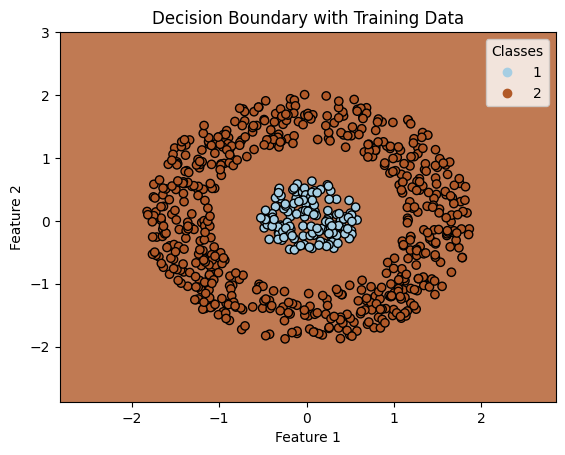

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load data (you will need to adjust file paths as necessary)
def load_data(file_path):
    data = np.loadtxt(file_path)
    X = data[:, :-1]  # 2D features
    y = data[:, -1]   # class labels
    return X, y

# Calculate mean vector and covariance matrix
def calculate_template(X):
    mean_vector = np.mean(X, axis=0)
    covariance_matrix = np.cov(X.T)
    return mean_vector, covariance_matrix

# Mahalanobis distance calculation
def mahalanobis_distance(x, mean, covariance_inv):
    diff = x - mean
    return np.sqrt(np.dot(np.dot(diff.T, covariance_inv), diff))

# Classify using reference templates
def classify(X, templates):
    predictions = []
    for x in X:
        distances = []
        for mean, covariance_inv in templates:
            distance = mahalanobis_distance(x, mean, covariance_inv)
            distances.append(distance)
        # Map result of argmin to class labels 1 and 2
        predicted_class = np.argmin(distances) + 1  # +1 to convert 0/1 to 1/2
        predictions.append(predicted_class)
    return np.array(predictions)


# Load train, validation, and test data
X_train, y_train = load_data(r'C:\Users\raksh\IML-project-dec-2024\classification_datasets\nonLinearlySeparable\combined_dataset_train.txt')
X_val, y_val = load_data(r'C:\Users\raksh\IML-project-dec-2024\classification_datasets\nonLinearlySeparable\combined_dataset_val.txt')
X_test, y_test = load_data(r'C:\Users\raksh\IML-project-dec-2024\classification_datasets\nonLinearlySeparable\combined_dataset_test.txt')

# Scale the data to ensure all features are on the same scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Calculate reference templates (mean and covariance matrix for each class)
templates = []
for label in np.unique(y_train):
    X_class = X_train[y_train == label]
    mean, covariance_matrix = calculate_template(X_class)
    covariance_inv = np.linalg.inv(covariance_matrix + np.eye(covariance_matrix.shape[0])*1e-6)  # Regularize covariance matrix
    templates.append((mean, covariance_inv))

# Classification on validation data for performance evaluation
y_val_pred = classify(X_val, templates)
print(y_val_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.2f}")

# Classification on test data
y_test_pred = classify(X_test, templates)
print(y_test_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Plotting the decision region with training data superimposed
h = 0.02  # step size in the mesh
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Create a grid of points to classify
grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_predictions = classify(grid_points, templates)
grid_predictions = grid_predictions.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, grid_predictions, alpha=0.8, cmap=plt.cm.Paired)

# Plot training data
scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired, marker='o', label='Training Data')

# Add color legend
plt.legend(*scatter.legend_elements(), title="Classes")

plt.title('Decision Boundary with Training Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


### Decision region plot for all the classes together with the testing data superposed 

Validation Predictions: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2]
Validation Accuracy: 0.80
Test Predictions: [2 2 2 2 2 2 2 2 2

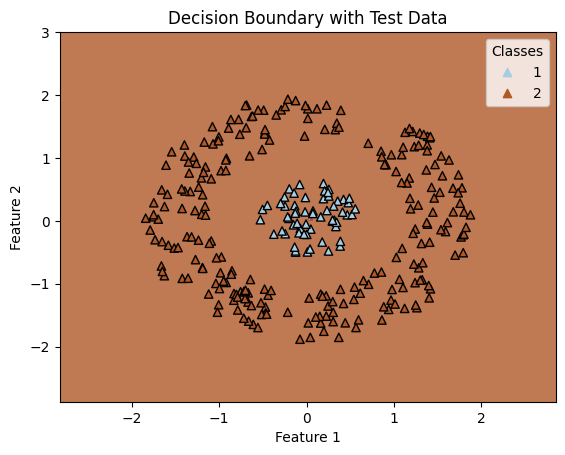

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load data (you will need to adjust file paths as necessary)
def load_data(file_path):
    data = np.loadtxt(file_path)
    X = data[:, :-1]  # 2D features
    y = data[:, -1]   # class labels
    return X, y

# Calculate mean vector and covariance matrix
def calculate_template(X):
    mean_vector = np.mean(X, axis=0)
    covariance_matrix = np.cov(X.T)
    return mean_vector, covariance_matrix

# Mahalanobis distance calculation
def mahalanobis_distance(x, mean, covariance_inv):
    diff = x - mean
    return np.sqrt(np.dot(np.dot(diff.T, covariance_inv), diff))

# Classify using reference templates
def classify(X, templates):
    predictions = []
    for x in X:
        distances = []
        for mean, covariance_inv in templates:
            distance = mahalanobis_distance(x, mean, covariance_inv)
            distances.append(distance)
        # We are assuming classes are 1 and 2, map the result of argmin accordingly
        predicted_class = np.argmin(distances) + 1  # +1 because np.argmin returns 0 or 1, we want 1 or 2
        predictions.append(predicted_class)
    return np.array(predictions)


# Scale the data to ensure all features are on the same scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Calculate reference templates (mean and covariance matrix for each class)
templates = []
for label in np.unique(y_train):
    X_class = X_train[y_train == label]
    mean, covariance_matrix = calculate_template(X_class)
    covariance_inv = np.linalg.inv(covariance_matrix + np.eye(covariance_matrix.shape[0])*1e-6)  # Regularize covariance matrix
    templates.append((mean, covariance_inv))

# Classification on validation data for performance evaluation
y_val_pred = classify(X_val, templates)
print(f"Validation Predictions: {y_val_pred}")
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.2f}")

# Classification on test data
y_test_pred = classify(X_test, templates)
print(f"Test Predictions: {y_test_pred}")
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Plotting the decision region with testing data superimposed
h = 0.02  # step size in the mesh
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Create a grid of points to classify
grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_predictions = classify(grid_points, templates)
grid_predictions = grid_predictions.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, grid_predictions, alpha=0.8, cmap=plt.cm.Paired)

# Plot testing data
scatter = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', cmap=plt.cm.Paired, marker='^', label='Test Data')

# Add color legend
plt.legend(*scatter.legend_elements(), title="Classes")

plt.title('Decision Boundary with Test Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


### Evaluation metrics

In [58]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate and display metrics for the test data
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    
    # Precision, Recall, and F1 score for each class (assuming class labels are 1 and 2)
    precision = precision_score(y_true, y_pred, average=None, labels=[1, 2])
    recall = recall_score(y_true, y_pred, average=None, labels=[1, 2])
    f_measure = f1_score(y_true, y_pred, average=None, labels=[1, 2])
    
    # Mean precision, recall, F-measure
    mean_precision = np.mean(precision)
    mean_recall = np.mean(recall)
    mean_f_measure = np.mean(f_measure)
    
    # Display results in a table
    metrics_table = pd.DataFrame({
        'Class': [1, 2],
        'Precision': precision,
        'Recall': recall,
        'F-Measure': f_measure
    })
    
    # Creating a row for the mean values
    mean_row = pd.DataFrame({
        'Class': ['Mean'],
        'Precision': [mean_precision],
        'Recall': [mean_recall],
        'F-Measure': [mean_f_measure]
    })
    
    # Concatenate the mean row to the metrics table
    metrics_table = pd.concat([metrics_table, mean_row], ignore_index=True)
    
    print(metrics_table)
    print(f"\nAccuracy: {accuracy:.2f}")
    
    return accuracy, precision, recall, f_measure, mean_precision, mean_recall, mean_f_measure

# Assuming y_test and y_test_pred are the true and predicted labels on the test data
# y_test_pred is the result of classify(X_test, templates)
# Calculate and print the metrics
accuracy, precision, recall, f_measure, mean_precision, mean_recall, mean_f_measure = calculate_metrics(y_test, y_test_pred)



  Class  Precision  Recall  F-Measure
0     1        0.0     0.0   0.000000
1     2        0.8     1.0   0.888889
2  Mean        0.4     0.5   0.444444

Accuracy: 0.80


c:\Users\raksh\anaconda3\envs\unet_env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Confusion Matrix

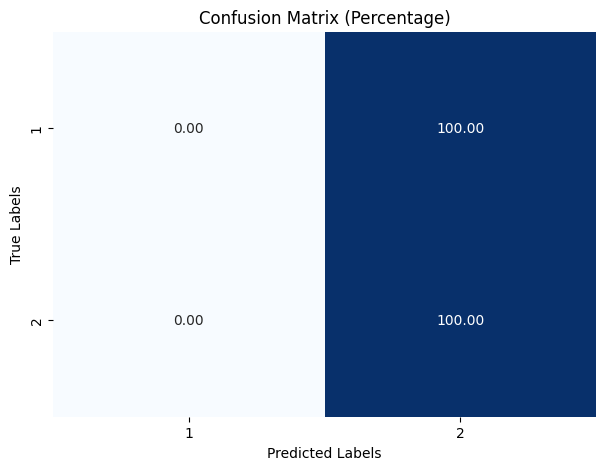

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

# Calculate confusion matrix and plot it
def plot_confusion_matrix(y_true, y_pred, labels=[1, 2]):
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    
    # Normalize confusion matrix to percentage
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    
    # Plot confusion matrix
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm_percentage, annot=True, fmt='.2f', cmap='Blues', xticklabels=labels, yticklabels=labels, cbar=False)
    plt.title('Confusion Matrix (Percentage)')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Plot confusion matrix based on test data performance
plot_confusion_matrix(y_test, y_test_pred, labels=[1, 2])


## Conclusion: 
### Issue with Reference Template-based Classifier and Concentric Ring Data
When working with a non-linearly separable dataset where the classes form concentric rings (with class 1 forming the innermost ring and class 2 forming the outer ring), I faced an issue where all the test samples were classified into class 2 using a Reference Template-based classifier that utilized both the mean vector and covariance matrix as templates. Despite having over 100 test samples labeled as class 1, they were all misclassified as class 2.

Additionally, I couldn't visualize the decision boundary for this approach, which also contributed to the challenge.

### Potential Reasons for the Issue:
#### Dominance of the Covariance Matrix:

The covariance matrix plays a key role in shaping the decision boundary of a Reference Template classifier. When both the mean and covariance matrix are used, the classifier models the distribution of the data assuming a Gaussian (normal) distribution for each class.
In a concentric ring structure, the covariance matrix may struggle to capture the circular nature of the data. This is because the covariance matrix typically assumes elliptical contours, which does not suit the ring-like configuration of the data. As a result, the classifier may incorrectly classify all samples as class 2, failing to recognize the ring structure.
#### Non-linearly Separable Data:

The concentric rings configuration, where class 1 is the inner ring and class 2 is the outer ring, poses a challenge for a model that assumes linear separability. The covariance matrix in the Reference Template classifier may fail to model this distribution correctly, leading to all test samples being classified as class 2.
The Mahalanobis distance used in the template classifier might not adequately capture the non-linear structure of the data, leading to misclassifications.
#### Degeneracy or Instability in the Covariance Matrix:

If the covariance matrix is nearly singular (due to small data variance or poor conditioning), it might cause instability, further contributing to the misclassification of samples.
Regularization of the covariance matrix is typically required in such cases, but it might still struggle to deal with non-linearly separable data like concentric rings.
#### Using Only the Mean Vector:

When I used only the mean vector as the template, the classifier was much simpler and treated the classes as if they were spherical in nature. This worked better for concentric rings since the mean vector naturally defines a decision boundary that might better capture the structure of the data.
The decision boundary in this case was more circular, which could explain why a decision plot was successfully generated, even though all test samples were still misclassified as class 2.
#### Conclusion and Next Steps:
The primary reason for all the test samples being classified into class 2 is likely the failure of the covariance matrix to capture the concentric ring structure of the data. The covariance matrix assumes an elliptical spread for each class, which does not suit ring-shaped distributions.
